## 1. OVERVIEW:
The data is related with direct marketing campaigns of a Portuguese banking institution, based on phone calls (Moro, Cortez, and Rita 2014).The goal of the campaigns were to get the clients to subscribe to a term deposit



## 2. REFERENCE
* [Towardsdatascience](https://towardsdatascience.com/machine-learning-case-study-a-data-driven-approach-to-predict-the-success-of-bank-telemarketing-20e37d46c31c)
    - Use AUC-ROC
* [eda-feature-engineering-and-machine-learning](https://www.kaggle.com/kaushikholla/eda-feature-engineering-and-machine-learning)
    - Social and economic context attributes affect the outcome the most
* [subscription-prediction-for-bank-marketing-data](https://www.kaggle.com/sachinrajput17/subscription-prediction-for-bank-marketing-data)  
* [Medium](https://medium0.com/@jameschen_78678/which-customers-are-more-likely-to-respond-to-banks-marketing-campaigns-3f00c512268d)  
* [bank-marketing-campaign-opening-a-term-deposit](https://www.kaggle.com/janiobachmann/bank-marketing-campaign-opening-a-term-deposit)


## 3. DATA OBSERVATION

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import pandas_profiling as pp

In [22]:
bank = pd.read_csv('bank-additional-full.csv', sep = ';')
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [23]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [24]:
    bank.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [25]:
bank.describe(include='object')


,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


In [26]:
bank[bank.duplicated(keep='first')]


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
1266,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
12261,36,retired,married,unknown,no,no,no,telephone,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
14234,27,technician,single,professional.course,no,no,no,cellular,jul,mon,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
16956,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,...,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
18465,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no
20216,55,services,married,high.school,unknown,no,no,cellular,aug,mon,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
20534,41,technician,married,professional.course,no,yes,no,cellular,aug,tue,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no
25217,39,admin.,married,university.degree,no,no,no,cellular,nov,tue,...,2,999,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,no
28477,24,services,single,high.school,no,yes,no,cellular,apr,tue,...,1,999,0,nonexistent,-1.8,93.075,-47.1,1.423,5099.1,no
32516,35,admin.,married,university.degree,no,yes,no,cellular,may,fri,...,4,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no


In [27]:
categorical_feature = bank.select_dtypes(exclude = np.number)
numeric_feature = bank.select_dtypes(include = np.number)



<AxesSubplot:>

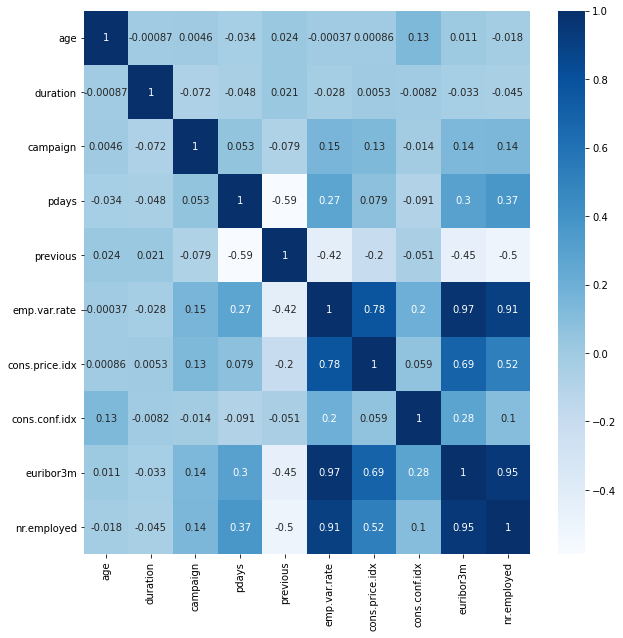

In [173]:
figsize= (10, 10)
fig, ax = plt.subplots(figsize=figsize)
sns.heatmap(numeric_feature.corr(),annot=True,cmap='Blues')

## 4. EXPLORATORY DATA ANALYSIS
## PROBLEM 1: CUSTOMER CHARACTERISTICS AND CAMPAIGN INFORMATION

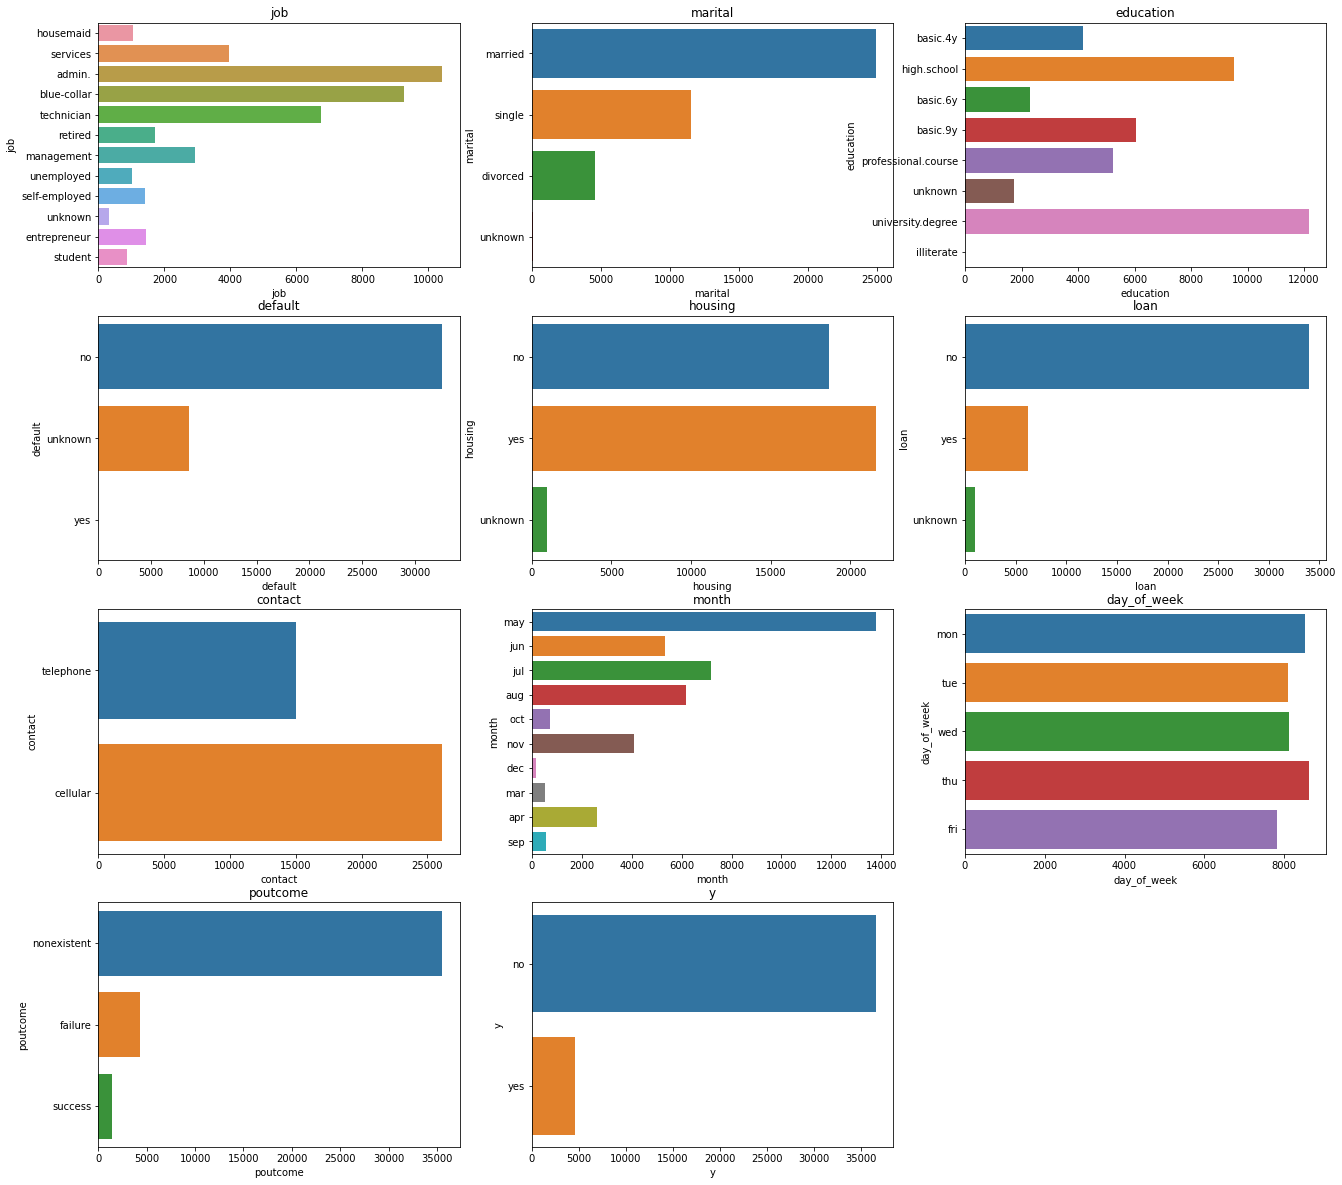

In [41]:
#check count based on categorical features
plt.figure(figsize=(22,80), facecolor='white')
plotnumber =1
for i in categorical_feature:
    ax = plt.subplot(15,3,plotnumber)
    sns.countplot(y=i, data=bank)
    plt.xlabel(i)
    plt.title(i)
    plotnumber+=1
plt.show()

### EVALUATION 1:

Customers Characteristics:
* Độ tuổi: dao dộng từ 17-98, giá trị trung vị là 40 tuổi
* Hầu hết khách hàng tiềm năng không có khoản vay cá nhân
* Hầu hết khách hàng tiềm năng đều có bằng Đại học 


Campaign Infomations:
* Hầu hết các cuộc gọi xảy ra vào tháng Năm.
* Các cuộc gọi thường diễn ra vào cuối tuần và số lượng cuộc gọi tương đối bằng nhau được ghi lại mỗi ngày trong tuần
* Xấp xỉ 65% trong số tất cả khách hàng tiềm năng được hỏi được liên lạc qua điện thoại di động



## PROBLEM 2: CUSTOMER CHARACTERISTICS WITH DECISION SENT DEPOSIT

In [177]:
np.round(bank.groupby(["y"]).mean(),1)

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
y,,,,,,,,,,
no,39.9,220.8,2.6,984.1,0.1,0.2,93.6,-40.6,3.8,5176.2
yes,40.9,553.2,2.1,792.0,0.5,-1.2,93.4,-39.8,2.1,5095.1


### EVALUATION 2:
* The longer the customer advisor, the more number of customer agree to deposit
* The lower the interest rate, the more number of customers agree to deposit

In [81]:
bank_client_data = ["job", "marital", "education","default", "housing", "loan"]
for i in bank_client_data:
    a = pd.crosstab(bank[i], bank['y'], normalize='index').sort_values(by='yes',ascending=False )
    print('\n--Yes/no according to '+ i +'--\n', a)


--Yes/no according to job--
 y                    no       yes
job                              
student        0.685714  0.314286
retired        0.747674  0.252326
unemployed     0.857988  0.142012
admin.         0.870274  0.129726
management     0.887825  0.112175
unknown        0.887879  0.112121
technician     0.891740  0.108260
self-employed  0.895144  0.104856
housemaid      0.900000  0.100000
entrepreneur   0.914835  0.085165
services       0.918619  0.081381
blue-collar    0.931057  0.068943

--Yes/no according to marital--
 y               no       yes
marital                     
unknown   0.850000  0.150000
single    0.859959  0.140041
divorced  0.896791  0.103209
married   0.898427  0.101573

--Yes/no according to education--
 y                          no       yes
education                              
illiterate           0.777778  0.222222
unknown              0.854997  0.145003
university.degree    0.862755  0.137245
professional.course  0.886515  0.113485
high.schoo

### EVALUATION 3:


| Y   | Job         | Marital | Education  | Default | Housing | Loan    |
| --  | ----------- | --------| ---------- | ------- | --------| -----   |
| Yes | Student     | Unknown | Illiterate | No      | Yes     | No      |
| No  | Blue-collar | Married | Basic.9y   | Yes     | Unknown | Unknown |

In [9]:
# fig, ax = plt.subplots()
# fig.set_size_inches(20, 8)
# sns.countplot(x = 'age', data = bank)
# ax.set_xlabel('Age', fontsize=15)
# ax.set_ylabel('Count', fontsize=15)
# ax.set_title('Age Count Distribution', fontsize=15)
# sns.despine()

In [8]:
# Function to count missing data and calculate percentage of total# def missing_data(df):
#     total = df.isnull().sum()
#     percent = total/df.isnull().count()*100
#     missing_values = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
#     types = []
#     for col in df.columns:
#         dtype = str(df[col].dtype)
#         types.append(dtype)
#     missing_values['Types'] = types
#     missing_values.sort_values('Total',ascending=False,inplace=True)
#     return(np.transpose(missing_values))
# missing_data(bank)

In [12]:
# Display bar chart 
# bank_client_data = ["age", "job", "marital", "education","default", "housing", "loan"]
# for i in bank_client_data:
#     fig, ax = plt.subplots()
#     fig.set_size_inches(20, 6)
#     sns.countplot(bank[i])
#     ax.set_title('{0} count distribution'.format(i),fontsize = 15)


In [181]:
# Dispaly histogram all numeric column
# numeric_feature.hist(figsize=(15,15),edgecolor='k',color='skyblue')